## 1. The World Bank's international debt data<a href="#1.-The-World-Bank&#39;s-international-debt-data" class="anchor-link">¶</a>

It's not that we humans only take debts to manage our necessities. A
country may also take debt to manage its economy. For example,
infrastructure spending is one costly ingredient required for a
country's citizens to lead comfortable lives. [The World
Bank](https://www.worldbank.org) is the organization that provides debt
to countries.

In this notebook, we are going to analyze international debt data
collected by The World Bank. The dataset contains information about the
amount of debt (in USD) owed by developing countries across several
categories. We are going to find the answers to questions like:

-   What is the total amount of debt that is owed by the countries
    listed in the dataset?
-   Which country owns the maximum amount of debt and what does that
    amount look like?
-   What is the average amount of debt owed by countries across
    different debt indicators?

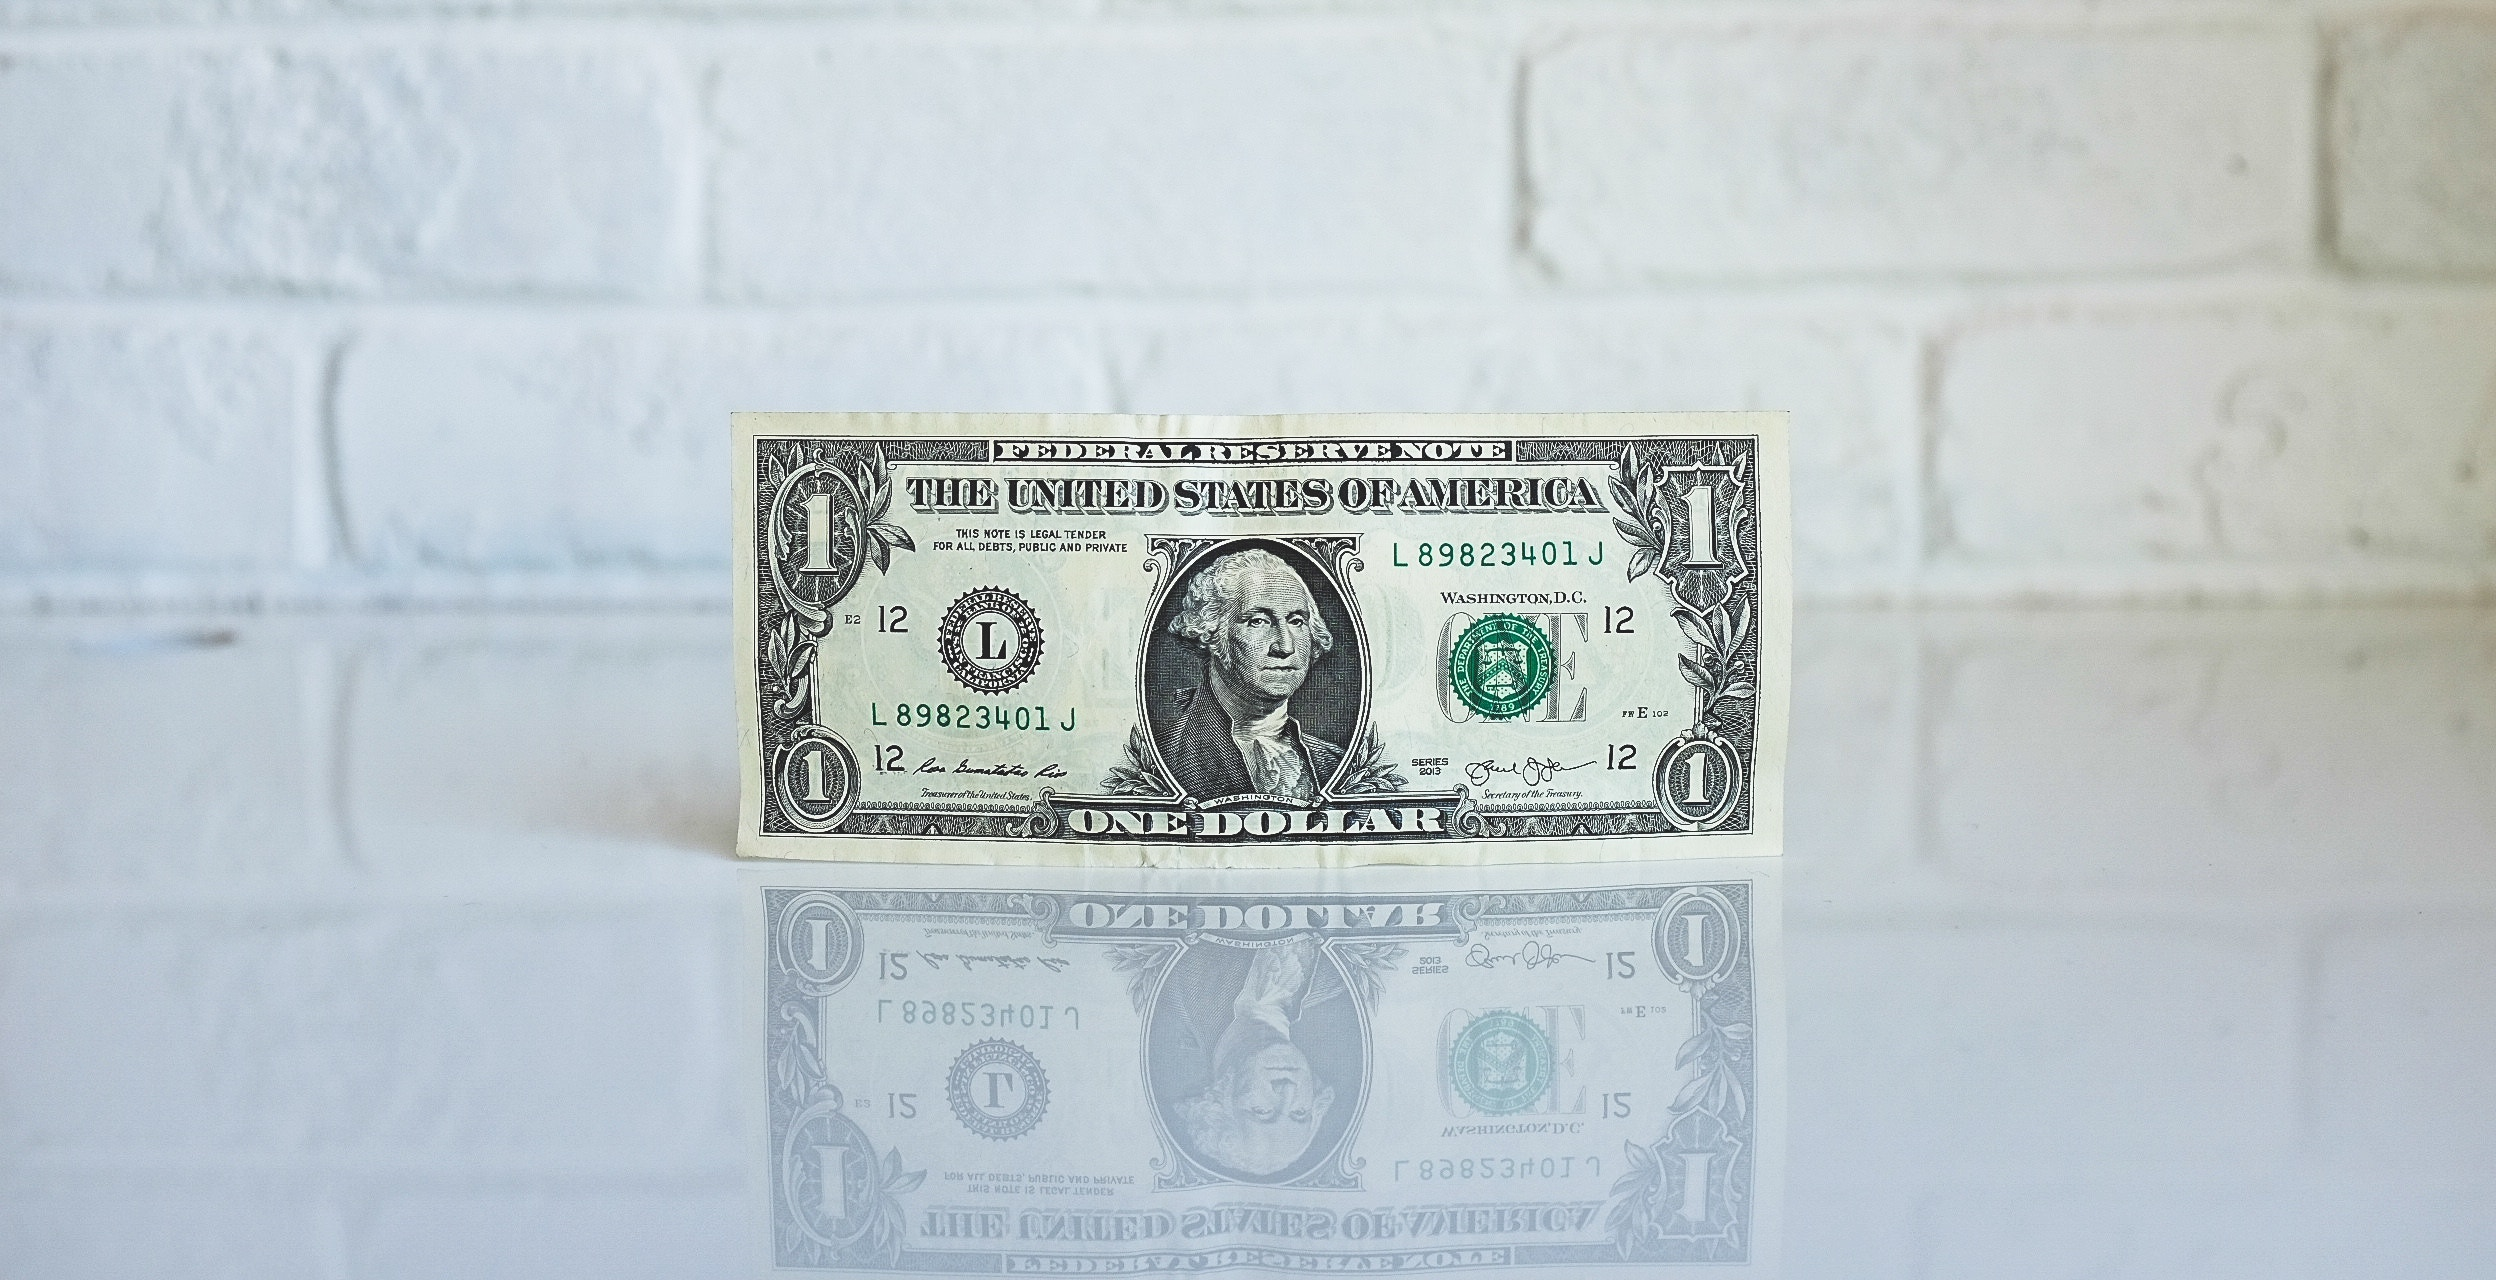

The first line of code connects us to the `international_debt` database
where the table `international_debt` is residing. Let's first `SELECT`
*all* of the columns from the `international_debt` table. Also, we'll
limit the output to the first ten rows to keep the output clean.

In \[98\]:

    %%sql
    postgresql:///international_debt
        
    SELECT *
    FROM international_debt
    LIMIT 10;

    10 rows affected.

Out\[98\]:

| country_name | country_code | indicator_name                                                    | indicator_code | debt                 |
|--------------|--------------|-------------------------------------------------------------------|----------------|----------------------|
| Afghanistan  | AFG          | Disbursements on external debt, long-term (DIS, current US\$)     | DT.DIS.DLXF.CD | 72894453.700000003   |
| Afghanistan  | AFG          | Interest payments on external debt, long-term (INT, current US\$) | DT.INT.DLXF.CD | 53239440.100000001   |
| Afghanistan  | AFG          | PPG, bilateral (AMT, current US\$)                                | DT.AMT.BLAT.CD | 61739336.899999999   |
| Afghanistan  | AFG          | PPG, bilateral (DIS, current US\$)                                | DT.DIS.BLAT.CD | 49114729.399999999   |
| Afghanistan  | AFG          | PPG, bilateral (INT, current US\$)                                | DT.INT.BLAT.CD | 39903620.100000001   |
| Afghanistan  | AFG          | PPG, multilateral (AMT, current US\$)                             | DT.AMT.MLAT.CD | 39107845             |
| Afghanistan  | AFG          | PPG, multilateral (DIS, current US\$)                             | DT.DIS.MLAT.CD | 23779724.300000001   |
| Afghanistan  | AFG          | PPG, multilateral (INT, current US\$)                             | DT.INT.MLAT.CD | 13335820             |
| Afghanistan  | AFG          | PPG, official creditors (AMT, current US\$)                       | DT.AMT.OFFT.CD | 100847181\.900000006 |
| Afghanistan  | AFG          | PPG, official creditors (DIS, current US\$)                       | DT.DIS.OFFT.CD | 72894453.700000003   |

In \[99\]:

    %%nose
    # %%nose needs to be included at the beginning of every @tests cell

    last_output = _

    def test_output():
        correct_result_string = '  country_name country_code                                     indicator_name  indicator_code                 debt\n0  Afghanistan          AFG  Disbursements on external debt, long-term (DIS...  DT.DIS.DLXF.CD   72894453.700000003\n1  Afghanistan          AFG  Interest payments on external debt, long-term ...  DT.INT.DLXF.CD   53239440.100000001\n2  Afghanistan          AFG                  PPG, bilateral (AMT, current US$)  DT.AMT.BLAT.CD   61739336.899999999\n3  Afghanistan          AFG                  PPG, bilateral (DIS, current US$)  DT.DIS.BLAT.CD   49114729.399999999\n4  Afghanistan          AFG                  PPG, bilateral (INT, current US$)  DT.INT.BLAT.CD   39903620.100000001\n5  Afghanistan          AFG               PPG, multilateral (AMT, current US$)  DT.AMT.MLAT.CD             39107845\n6  Afghanistan          AFG               PPG, multilateral (DIS, current US$)  DT.DIS.MLAT.CD   23779724.300000001\n7  Afghanistan          AFG               PPG, multilateral (INT, current US$)  DT.INT.MLAT.CD             13335820\n8  Afghanistan          AFG         PPG, official creditors (AMT, current US$)  DT.AMT.OFFT.CD  100847181.900000006\n9  Afghanistan          AFG         PPG, official creditors (DIS, current US$)  DT.DIS.OFFT.CD   72894453.700000003'
        try:
            assert last_output.DataFrame().to_string() == correct_result_string
        except AttributeError:
            assert False, "Please ensure a SQL ResultSet is the output of the code cell."
        except AssertionError:
            assert False, "The results of the query are incorrect. Please review the instructions and check the hint if necessary."

Out\[99\]:

    1/1 tests passed

## 2. Finding the number of distinct countries<a href="#2.-Finding-the-number-of-distinct-countries" class="anchor-link">¶</a>

From the first ten rows, we can see the amount of debt owed by
*Afghanistan* in the different debt indicators. But we do not know the
number of different countries we have on the table. There are
repetitions in the country names because a country is most likely to
have debt in more than one debt indicator.

Without a count of unique countries, we will not be able to perform our
statistical analyses holistically. In this section, we are going to
extract the number of unique countries present in the table.

In \[100\]:

    %%sql
    SELECT 
        COUNT(DISTINCT country_name) AS total_distinct_countries
    FROM international_debt;

     * postgresql:///international_debt
    1 rows affected.

Out\[100\]:

| total_distinct_countries |
|--------------------------|
| 124                      |

In \[101\]:

    %%nose
    # %%nose needs to be included at the beginning of every @tests cell

    last_output = _

    def test_output():
        correct_result_string = '   total_distinct_countries\n0                       124'
        try:
            assert last_output.DataFrame().to_string() == correct_result_string
        except AttributeError:
            assert False, "Please ensure a SQL ResultSet is the output of the code cell."
        except AssertionError:
            assert False, "The results of the query are incorrect. Please review the instructions and check the hint if necessary."

Out\[101\]:

    1/1 tests passed

## 3. Finding out the distinct debt indicators<a href="#3.-Finding-out-the-distinct-debt-indicators" class="anchor-link">¶</a>

We can see there are a total of 124 countries present on the table. As
we saw in the first section, there is a column called `indicator_name`
that briefly specifies the purpose of taking the debt. Just beside that
column, there is another column called `indicator_code` which symbolizes
the category of these debts. Knowing about these various debt indicators
will help us to understand the areas in which a country can possibly be
indebted to.

In \[102\]:

    %%sql
    SELECT DISTINCT(indicator_code) as distinct_debt_indicators
    FROM international_debt
    ORDER BY distinct_debt_indicators

     * postgresql:///international_debt
    25 rows affected.

Out\[102\]:

| distinct_debt_indicators |
|--------------------------|
| DT.AMT.BLAT.CD           |
| DT.AMT.DLXF.CD           |
| DT.AMT.DPNG.CD           |
| DT.AMT.MLAT.CD           |
| DT.AMT.OFFT.CD           |
| DT.AMT.PBND.CD           |
| DT.AMT.PCBK.CD           |
| DT.AMT.PROP.CD           |
| DT.AMT.PRVT.CD           |
| DT.DIS.BLAT.CD           |
| DT.DIS.DLXF.CD           |
| DT.DIS.MLAT.CD           |
| DT.DIS.OFFT.CD           |
| DT.DIS.PCBK.CD           |
| DT.DIS.PROP.CD           |
| DT.DIS.PRVT.CD           |
| DT.INT.BLAT.CD           |
| DT.INT.DLXF.CD           |
| DT.INT.DPNG.CD           |
| DT.INT.MLAT.CD           |
| DT.INT.OFFT.CD           |
| DT.INT.PBND.CD           |
| DT.INT.PCBK.CD           |
| DT.INT.PROP.CD           |
| DT.INT.PRVT.CD           |

In \[103\]:

    %%nose
    # %%nose needs to be included at the beginning of every @tests cell

    last_output = _

    def test_output():
        correct_result_string = '   distinct_debt_indicators\n0            DT.AMT.BLAT.CD\n1            DT.AMT.DLXF.CD\n2            DT.AMT.DPNG.CD\n3            DT.AMT.MLAT.CD\n4            DT.AMT.OFFT.CD\n5            DT.AMT.PBND.CD\n6            DT.AMT.PCBK.CD\n7            DT.AMT.PROP.CD\n8            DT.AMT.PRVT.CD\n9            DT.DIS.BLAT.CD\n10           DT.DIS.DLXF.CD\n11           DT.DIS.MLAT.CD\n12           DT.DIS.OFFT.CD\n13           DT.DIS.PCBK.CD\n14           DT.DIS.PROP.CD\n15           DT.DIS.PRVT.CD\n16           DT.INT.BLAT.CD\n17           DT.INT.DLXF.CD\n18           DT.INT.DPNG.CD\n19           DT.INT.MLAT.CD\n20           DT.INT.OFFT.CD\n21           DT.INT.PBND.CD\n22           DT.INT.PCBK.CD\n23           DT.INT.PROP.CD\n24           DT.INT.PRVT.CD'
        try:    
            assert last_output.DataFrame().to_string() == correct_result_string
        except AttributeError:
            assert False, "Please ensure a SQL ResultSet is the output of the code cell."
        except AssertionError:
            assert False, "The results of the query are incorrect. Please review the instructions and check the hint if necessary."

Out\[103\]:

    1/1 tests passed

## 4. Totaling the amount of debt owed by the countries<a href="#4.-Totaling-the-amount-of-debt-owed-by-the-countries" class="anchor-link">¶</a>

As mentioned earlier, the financial debt of a particular country
represents its economic state. But if we were to project this on an
overall global scale, how will we approach it?

Let's switch gears from the debt indicators now and find out the total
amount of debt (in USD) that is owed by the different countries. This
will give us a sense of how the overall economy of the entire world is
holding up.

In \[104\]:

    %%sql
    SELECT ROUND(SUM(debt)/1000000, 2) AS total_debt 
    FROM international_debt; 

     * postgresql:///international_debt
    1 rows affected.

Out\[104\]:

| total_debt |
|------------|
| 3079734.49 |

In \[105\]:

    %%nose
    # %%nose needs to be included at the beginning of every @tests cell

    last_output = _

    def test_output():
        correct_result_string = '   total_debt\n0  3079734.49'
        try:
            assert last_output.DataFrame().to_string() == correct_result_string
        except AttributeError:
            assert False, "Please ensure a SQL ResultSet is the output of the code cell."
        except AssertionError:
            assert False, "The results of the query are incorrect. Please review the instructions and check the hint if necessary."

Out\[105\]:

    1/1 tests passed

## 5. Country with the highest debt<a href="#5.-Country-with-the-highest-debt" class="anchor-link">¶</a>

"Human beings cannot comprehend very large or very small numbers. It
would be useful for us to acknowledge that fact." - [Daniel
Kahneman](https://en.wikipedia.org/wiki/Daniel_Kahneman). That is more
than *3 million **million*** USD, an amount which is really hard for us
to fathom.

Now that we have the exact total of the amounts of debt owed by several
countries, let's now find out the country that owns the highest amount
of debt along with the amount. **Note** that this debt is the sum of
different debts owed by a country across several categories. This will
help to understand more about the country in terms of its socio-economic
scenarios. We can also find out the category in which the country owns
its highest debt. But we will leave that for now.

In \[106\]:

    %%sql
    SELECT 
        country_name, SUM(debt) AS total_debt 
    FROM international_debt
    GROUP BY country_name
    ORDER BY total_debt DESC
    LIMIT 1;

     * postgresql:///international_debt
    1 rows affected.

Out\[106\]:

| country_name | total_debt             |
|--------------|------------------------|
| China        | 285793494734.200001568 |

In \[107\]:

    %%nose
    # %%nose needs to be included at the beginning of every @tests cell

    last_output = _

    def test_output():
        correct_result_string = '  country_name              total_debt\n0        China  285793494734.200001568'
        try:
            assert last_output.DataFrame().to_string() == correct_result_string
        except AttributeError:
            assert False, "Please ensure a SQL ResultSet is the output of the code cell."
        except AssertionError:
            assert False, "The results of the query are incorrect. Please review the instructions and check the hint if necessary."

Out\[107\]:

    1/1 tests passed

## 6. Average amount of debt across indicators<a href="#6.-Average-amount-of-debt-across-indicators" class="anchor-link">¶</a>

So, it was *China*. A more in-depth breakdown of China's debts can be
found [here](https://datatopics.worldbank.org/debt/ids/country/CHN).

We now have a brief overview of the dataset and a few of its summary
statistics. We already have an idea of the different debt indicators in
which the countries owe their debts. We can dig even further to find out
on an average how much debt a country owes? This will give us a better
sense of the distribution of the amount of debt across different
indicators.

In \[108\]:

    %%sql
    SELECT 
        indicator_code AS debt_indicator,
        indicator_name,
        AVG(debt) as average_debt
    FROM international_debt
    GROUP BY debt_indicator, indicator_name
    ORDER BY average_debt DESC
    LIMIT 10;

     * postgresql:///international_debt
    10 rows affected.

Out\[108\]:

| debt_indicator | indicator_name                                                                         | average_debt         |
|----------------|----------------------------------------------------------------------------------------|----------------------|
| DT.AMT.DLXF.CD | Principal repayments on external debt, long-term (AMT, current US\$)                   | 5904868401.499193612 |
| DT.AMT.DPNG.CD | Principal repayments on external debt, private nonguaranteed (PNG) (AMT, current US\$) | 5161194333.812658349 |
| DT.DIS.DLXF.CD | Disbursements on external debt, long-term (DIS, current US\$)                          | 2152041216.890243888 |
| DT.DIS.OFFT.CD | PPG, official creditors (DIS, current US\$)                                            | 1958983452.859836046 |
| DT.AMT.PRVT.CD | PPG, private creditors (AMT, current US\$)                                             | 1803694101.963265321 |
| DT.INT.DLXF.CD | Interest payments on external debt, long-term (INT, current US\$)                      | 1644024067.650806481 |
| DT.DIS.BLAT.CD | PPG, bilateral (DIS, current US\$)                                                     | 1223139290.398230108 |
| DT.INT.DPNG.CD | Interest payments on external debt, private nonguaranteed (PNG) (INT, current US\$)    | 1220410844.421518983 |
| DT.AMT.OFFT.CD | PPG, official creditors (AMT, current US\$)                                            | 1191187963.083064523 |
| DT.AMT.PBND.CD | PPG, bonds (AMT, current US\$)                                                         | 1082623947.653623188 |

In \[109\]:

    %%nose
    # %%nose needs to be included at the beginning of every @tests cell

    last_output = _

    def test_output():
        correct_result_string = '   debt_indicator                                     indicator_name          average_debt\n0  DT.AMT.DLXF.CD  Principal repayments on external debt, long-te...  5904868401.499193612\n1  DT.AMT.DPNG.CD  Principal repayments on external debt, private...  5161194333.812658349\n2  DT.DIS.DLXF.CD  Disbursements on external debt, long-term (DIS...  2152041216.890243888\n3  DT.DIS.OFFT.CD         PPG, official creditors (DIS, current US$)  1958983452.859836046\n4  DT.AMT.PRVT.CD          PPG, private creditors (AMT, current US$)  1803694101.963265321\n5  DT.INT.DLXF.CD  Interest payments on external debt, long-term ...  1644024067.650806481\n6  DT.DIS.BLAT.CD                  PPG, bilateral (DIS, current US$)  1223139290.398230108\n7  DT.INT.DPNG.CD  Interest payments on external debt, private no...  1220410844.421518983\n8  DT.AMT.OFFT.CD         PPG, official creditors (AMT, current US$)  1191187963.083064523\n9  DT.AMT.PBND.CD                      PPG, bonds (AMT, current US$)  1082623947.653623188'
        try:
            assert last_output.DataFrame().to_string() == correct_result_string
        except AttributeError:
            assert False, "Please ensure a SQL ResultSet is the output of the code cell."
        except AssertionError:
            assert False, "The results of the query are incorrect. Please review the instructions and check the hint if necessary."

Out\[109\]:

    1/1 tests passed

## 7. The highest amount of principal repayments<a href="#7.-The-highest-amount-of-principal-repayments" class="anchor-link">¶</a>

We can see that the indicator `DT.AMT.DLXF.CD` tops the chart of average
debt. This category includes repayment of long term debts. Countries
take on long-term debt to acquire immediate capital. More information
about this category can be found
[here](https://datacatalog.worldbank.org/principal-repayments-external-debt-long-term-amt-current-us-0).

An interesting observation in the above finding is that there is a huge
difference in the amounts of the indicators after the second one. This
indicates that the first two indicators might be the most severe
categories in which the countries owe their debts.

We can investigate this a bit more so as to find out which country owes
the highest amount of debt in the category of long term debts
(`DT.AMT.DLXF.CD`). Since not all the countries suffer from the same
kind of economic disturbances, this finding will allow us to understand
that particular country's economic condition a bit more specifically.

In \[110\]:

    %%sql
    SELECT 
        country_name, 
        indicator_name
    FROM international_debt
    WHERE debt = (SELECT 
                     MAX(debt)
                 FROM international_debt
                 WHERE indicator_code = 'DT.AMT.DLXF.CD');

     * postgresql:///international_debt
    1 rows affected.

Out\[110\]:

| country_name | indicator_name                                                       |
|--------------|----------------------------------------------------------------------|
| China        | Principal repayments on external debt, long-term (AMT, current US\$) |

In \[111\]:

    %%nose
    # %%nose needs to be included at the beginning of every @tests cell

    last_output = _

    def test_output():
        correct_result_string = '  country_name                                     indicator_name\n0        China  Principal repayments on external debt, long-te...'
        try:
            assert last_output.DataFrame().to_string() == correct_result_string
        except AttributeError:
            assert False, "Please ensure a SQL ResultSet is the output of the code cell."
        except AssertionError:
            assert False, "The results of the query are incorrect. Please review the instructions and check the hint if necessary."

Out\[111\]:

    1/1 tests passed

## 8. The most common debt indicator<a href="#8.-The-most-common-debt-indicator" class="anchor-link">¶</a>

China has the highest amount of debt in the long-term debt
(`DT.AMT.DLXF.CD`) category. This is verified by [The World
Bank](https://data.worldbank.org/indicator/DT.AMT.DLXF.CD?end=2018&most_recent_value_desc=true).
It is often a good idea to verify our analyses like this since it
validates that our investigations are correct.

We saw that long-term debt is the topmost category when it comes to the
average amount of debt. But is it the most common indicator in which the
countries owe their debt? Let's find that out.

In \[112\]:

    %%sql
    SELECT indicator_code, COUNT(indicator_code) AS indicator_count
    FROM international_debt
    GROUP BY indicator_code
    ORDER BY indicator_count DESC, indicator_code DESC
    LIMIT 20;

     * postgresql:///international_debt
    20 rows affected.

Out\[112\]:

| indicator_code | indicator_count |
|----------------|-----------------|
| DT.INT.OFFT.CD | 124             |
| DT.INT.MLAT.CD | 124             |
| DT.INT.DLXF.CD | 124             |
| DT.AMT.OFFT.CD | 124             |
| DT.AMT.MLAT.CD | 124             |
| DT.AMT.DLXF.CD | 124             |
| DT.DIS.DLXF.CD | 123             |
| DT.INT.BLAT.CD | 122             |
| DT.DIS.OFFT.CD | 122             |
| DT.AMT.BLAT.CD | 122             |
| DT.DIS.MLAT.CD | 120             |
| DT.DIS.BLAT.CD | 113             |
| DT.INT.PRVT.CD | 98              |
| DT.AMT.PRVT.CD | 98              |
| DT.INT.PCBK.CD | 84              |
| DT.AMT.PCBK.CD | 84              |
| DT.INT.DPNG.CD | 79              |
| DT.AMT.DPNG.CD | 79              |
| DT.INT.PBND.CD | 69              |
| DT.AMT.PBND.CD | 69              |

In \[113\]:

    %%nose
    # %%nose needs to be included at the beginning of every @tests cell

    last_output = _

    def test_output():
        correct_result_string = '    indicator_code  indicator_count\n0   DT.INT.OFFT.CD              124\n1   DT.INT.MLAT.CD              124\n2   DT.INT.DLXF.CD              124\n3   DT.AMT.OFFT.CD              124\n4   DT.AMT.MLAT.CD              124\n5   DT.AMT.DLXF.CD              124\n6   DT.DIS.DLXF.CD              123\n7   DT.INT.BLAT.CD              122\n8   DT.DIS.OFFT.CD              122\n9   DT.AMT.BLAT.CD              122\n10  DT.DIS.MLAT.CD              120\n11  DT.DIS.BLAT.CD              113\n12  DT.INT.PRVT.CD               98\n13  DT.AMT.PRVT.CD               98\n14  DT.INT.PCBK.CD               84\n15  DT.AMT.PCBK.CD               84\n16  DT.INT.DPNG.CD               79\n17  DT.AMT.DPNG.CD               79\n18  DT.INT.PBND.CD               69\n19  DT.AMT.PBND.CD               69'
        try:
            assert last_output.DataFrame().to_string() == correct_result_string
        except AttributeError:
            assert False, "Please ensure a SQL ResultSet is the output of the code cell."
        except AssertionError:
            assert False, "The results of the query are incorrect. Please review the instructions and check the hint if necessary."

Out\[113\]:

    1/1 tests passed

## 9. Other viable debt issues and conclusion<a href="#9.-Other-viable-debt-issues-and-conclusion" class="anchor-link">¶</a>

There are a total of six debt indicators in which all the countries
listed in our dataset have taken debt. The indicator `DT.AMT.DLXF.CD` is
also there in the list. So, this gives us a clue that all these
countries are suffering from a common economic issue. But that is not
the end of the story, but just a part of the story.

Let's change tracks from `debt_indicator`s now and focus on the amount
of debt again. Let's find out the maximum amount of debt that each
country has. With this, we will be in a position to identify the other
plausible economic issues a country might be going through.

In this notebook, we took a look at debt owed by countries across the
globe. We extracted a few summary statistics from the data and unraveled
some interesting facts and figures. We also validated our findings to
make sure the investigations are correct.

In \[114\]:

    %%sql
    SELECT country_name, MAX(debt) AS maximum_debt
    FROM international_debt
    GROUP BY country_name
    ORDER BY maximum_debt DESC
    LIMIT 10;

     * postgresql:///international_debt
    10 rows affected.

Out\[114\]:

| country_name                                 | maximum_debt          |
|----------------------------------------------|-----------------------|
| China                                        | 96218620835.699996948 |
| Brazil                                       | 90041840304.100006104 |
| Russian Federation                           | 66589761833.5         |
| Turkey                                       | 51555031005.800003052 |
| South Asia                                   | 48756295898.199996948 |
| Least developed countries: UN classification | 40160766261.599998474 |
| IDA only                                     | 34531188113.199996948 |
| India                                        | 31923507000.799999237 |
| Indonesia                                    | 30916112653.799999237 |
| Kazakhstan                                   | 27482093686.400001526 |

In \[115\]:

    %%nose
    # %%nose needs to be included at the beginning of every @tests cell

    last_output = _

    def test_output():
        correct_result_string = '                                   country_name           maximum_debt\n0                                         China  96218620835.699996948\n1                                        Brazil  90041840304.100006104\n2                            Russian Federation          66589761833.5\n3                                        Turkey  51555031005.800003052\n4                                    South Asia  48756295898.199996948\n5  Least developed countries: UN classification  40160766261.599998474\n6                                      IDA only  34531188113.199996948\n7                                         India  31923507000.799999237\n8                                     Indonesia  30916112653.799999237\n9                                    Kazakhstan  27482093686.400001526'
        try:
            assert last_output.DataFrame().to_string() == correct_result_string
        except AttributeError:
            assert False, "Please ensure a SQL ResultSet is the output of the code cell."
        except AssertionError:
            assert False, "The results of the query are incorrect. Please review the instructions and check the hint if necessary."

Out\[115\]:

    1/1 tests passed